# Model that can Detect the difference between a Mine and a Rock

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
import tensorflow as tf

Function for reading the datast and for encoding

In [11]:
def read_dataset():
    df = pd.read_csv("sonar.all-data.csv")
    # X and y are np arrays
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    # Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    #encoder.classes_
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    return X,Y

Function for OneHotEncoding

In [12]:
def one_hot_encode(y):
    n_labels = len(y)
    n_unique_labels = len(np.unique(y))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),y] = 1
    return one_hot_encode

Defining the Multi Layer Perceptron

In [13]:
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer with sigmoid activated
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activated
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Hidden layer with sigmoid activated
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # Hidden layer with RELU activated
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']+biases['out'])
    return out_layer

In [14]:
# Read the dataset
X, Y = read_dataset()

In [15]:
# Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state = 1)

In [16]:
# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=415)

In [17]:
# Inspect the shape of the training and testing
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(165, 60)
(165, 2)
(42, 60)
(42, 2)


In [20]:
# Define the important parametrs and variables to work with the tensors
learning_rate = 0.02
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype=float)
n_dim = X.shape[1]
print("n_dim =",n_dim)

n_dim = 60


In [21]:
n_class = 2

In [22]:
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 70
n_hidden_3 = 70
n_hidden_4 = 60

In [23]:
x = tf.placeholder(tf.float32,[None,n_dim]) # None means any value
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_true = tf.placeholder(tf.float32,[None,n_class])

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [25]:
# Initialize all the variables
init = tf.global_variables_initializer()

In [26]:
#  Saver object to save our model
saver = tf.train.Saver()

In [27]:
# Call your model defined
y = multilayer_perceptron(x, weights, biases)

In [28]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_true))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [29]:
# Calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []
print("**")
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_true:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_true:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy,feed_dict={x: train_x, y_true:train_y})
    accuracy_history.append(accuracy)
    
    print('epoch: ',epoch,' - ','cost:',cost,' -MSE:',mse_," -Train Accuracy: ",accuracy)

**
(165, 60)
(165, 2)
(42, 60)
(42, 2)
epoch:  0  -  cost: 154.50835  -MSE: 19991.40560666472  -Train Accuracy:  0.45454547
epoch:  1  -  cost: 21.127316  -MSE: 681.8202248506259  -Train Accuracy:  0.54545456
epoch:  2  -  cost: 40.073597  -MSE: 1508.3353055975604  -Train Accuracy:  0.45454547
epoch:  3  -  cost: 21.209328  -MSE: 671.5613075662279  -Train Accuracy:  0.54545456
epoch:  4  -  cost: 15.536594  -MSE: 345.5052856372247  -Train Accuracy:  0.45454547
epoch:  5  -  cost: 20.76442  -MSE: 627.8036895673434  -Train Accuracy:  0.54545456
epoch:  6  -  cost: 5.430752  -MSE: 139.14671651622206  -Train Accuracy:  0.45454547
epoch:  7  -  cost: 19.650862  -MSE: 555.6675035201663  -Train Accuracy:  0.54545456
epoch:  8  -  cost: 1.1427866  -MSE: 94.30424250004391  -Train Accuracy:  0.47878787
epoch:  9  -  cost: 2.3945506  -MSE: 99.98682797517696  -Train Accuracy:  0.56363636
epoch:  10  -  cost: 13.961723  -MSE: 257.3109244071779  -Train Accuracy:  0.45454547
epoch:  11  -  cost: 5.83

epoch:  96  -  cost: 0.5404672  -MSE: 15.928145328799607  -Train Accuracy:  0.6909091
epoch:  97  -  cost: 0.54100376  -MSE: 16.427572839035584  -Train Accuracy:  0.73939395
epoch:  98  -  cost: 0.5378352  -MSE: 15.678566652723513  -Train Accuracy:  0.7090909
epoch:  99  -  cost: 0.5383879  -MSE: 16.200561179795915  -Train Accuracy:  0.73939395
epoch:  100  -  cost: 0.53576696  -MSE: 15.538291940509534  -Train Accuracy:  0.72121215
epoch:  101  -  cost: 0.5358885  -MSE: 16.008807007547333  -Train Accuracy:  0.73939395
epoch:  102  -  cost: 0.5335947  -MSE: 15.3474842628973  -Train Accuracy:  0.73333335
epoch:  103  -  cost: 0.53328305  -MSE: 15.842582817651904  -Train Accuracy:  0.74545455
epoch:  104  -  cost: 0.5309641  -MSE: 15.16244242895473  -Train Accuracy:  0.73333335
epoch:  105  -  cost: 0.53124404  -MSE: 15.659153330038261  -Train Accuracy:  0.74545455
epoch:  106  -  cost: 0.528353  -MSE: 14.964878899615474  -Train Accuracy:  0.73939395
epoch:  107  -  cost: 0.5279073  -MSE:

epoch:  190  -  cost: 0.4338882  -MSE: 12.326854711360003  -Train Accuracy:  0.8181818
epoch:  191  -  cost: 0.43270528  -MSE: 12.775494273066164  -Train Accuracy:  0.7878788
epoch:  192  -  cost: 0.43063012  -MSE: 12.334454549267955  -Train Accuracy:  0.8242424
epoch:  193  -  cost: 0.42916384  -MSE: 12.737298137681787  -Train Accuracy:  0.8060606
epoch:  194  -  cost: 0.42720652  -MSE: 12.297334697468866  -Train Accuracy:  0.830303
epoch:  195  -  cost: 0.42570505  -MSE: 12.70375887619041  -Train Accuracy:  0.8060606
epoch:  196  -  cost: 0.42379808  -MSE: 12.286407735858136  -Train Accuracy:  0.8363636
epoch:  197  -  cost: 0.42239562  -MSE: 12.660205615383873  -Train Accuracy:  0.8121212
epoch:  198  -  cost: 0.42071116  -MSE: 12.279374330895351  -Train Accuracy:  0.8363636
epoch:  199  -  cost: 0.41932392  -MSE: 12.634830042518464  -Train Accuracy:  0.8121212
epoch:  200  -  cost: 0.41805914  -MSE: 12.253048039150533  -Train Accuracy:  0.8363636
epoch:  201  -  cost: 0.416432  -MS

epoch:  285  -  cost: 0.37318745  -MSE: 11.78873970779147  -Train Accuracy:  0.830303
epoch:  286  -  cost: 0.37160712  -MSE: 11.297805706505864  -Train Accuracy:  0.8484849
epoch:  287  -  cost: 0.3720607  -MSE: 11.73000218261239  -Train Accuracy:  0.830303
epoch:  288  -  cost: 0.37063593  -MSE: 11.245520126947373  -Train Accuracy:  0.8484849
epoch:  289  -  cost: 0.3709935  -MSE: 11.733000530215483  -Train Accuracy:  0.830303
epoch:  290  -  cost: 0.36978742  -MSE: 11.26863714645892  -Train Accuracy:  0.8484849
epoch:  291  -  cost: 0.3701947  -MSE: 11.733319619808041  -Train Accuracy:  0.830303
epoch:  292  -  cost: 0.36900336  -MSE: 11.258387344129774  -Train Accuracy:  0.8484849
epoch:  293  -  cost: 0.36962658  -MSE: 11.74672711571838  -Train Accuracy:  0.830303
epoch:  294  -  cost: 0.36837605  -MSE: 11.2408360692739  -Train Accuracy:  0.8484849
epoch:  295  -  cost: 0.36907777  -MSE: 11.736554927178773  -Train Accuracy:  0.830303
epoch:  296  -  cost: 0.36732426  -MSE: 11.2553

epoch:  379  -  cost: 0.33249667  -MSE: 12.544819311750281  -Train Accuracy:  0.8545455
epoch:  380  -  cost: 0.33076912  -MSE: 12.035042262822682  -Train Accuracy:  0.8666667
epoch:  381  -  cost: 0.3303365  -MSE: 12.536743665219277  -Train Accuracy:  0.8545455
epoch:  382  -  cost: 0.32867828  -MSE: 12.029747127052753  -Train Accuracy:  0.8666667
epoch:  383  -  cost: 0.32848322  -MSE: 12.502220926370992  -Train Accuracy:  0.8606061
epoch:  384  -  cost: 0.32716507  -MSE: 12.037672783297126  -Train Accuracy:  0.8727273
epoch:  385  -  cost: 0.32710594  -MSE: 12.523510784531931  -Train Accuracy:  0.8606061
epoch:  386  -  cost: 0.32577798  -MSE: 12.051615284513762  -Train Accuracy:  0.8666667
epoch:  387  -  cost: 0.32557786  -MSE: 12.51278958210086  -Train Accuracy:  0.8666667
epoch:  388  -  cost: 0.3245955  -MSE: 12.044869129334652  -Train Accuracy:  0.8666667
epoch:  389  -  cost: 0.324395  -MSE: 12.504470976521898  -Train Accuracy:  0.8666667
epoch:  390  -  cost: 0.3230253  -MSE

epoch:  473  -  cost: 0.29531217  -MSE: 13.084980867614377  -Train Accuracy:  0.8909091
epoch:  474  -  cost: 0.29451358  -MSE: 12.591851615268396  -Train Accuracy:  0.8848485
epoch:  475  -  cost: 0.29465374  -MSE: 13.093420310852439  -Train Accuracy:  0.8909091
epoch:  476  -  cost: 0.2941115  -MSE: 12.601628825820317  -Train Accuracy:  0.8848485
epoch:  477  -  cost: 0.29425478  -MSE: 13.148875757948097  -Train Accuracy:  0.8909091
epoch:  478  -  cost: 0.29341948  -MSE: 12.661834177471126  -Train Accuracy:  0.8848485
epoch:  479  -  cost: 0.2936506  -MSE: 13.17251752507722  -Train Accuracy:  0.8909091
epoch:  480  -  cost: 0.29284322  -MSE: 12.679374311496039  -Train Accuracy:  0.8848485
epoch:  481  -  cost: 0.29309517  -MSE: 13.208762940526215  -Train Accuracy:  0.8909091
epoch:  482  -  cost: 0.29237774  -MSE: 12.713513641472408  -Train Accuracy:  0.8848485
epoch:  483  -  cost: 0.29257393  -MSE: 13.248689761620549  -Train Accuracy:  0.8909091
epoch:  484  -  cost: 0.29201388  -

epoch:  567  -  cost: 0.27264738  -MSE: 14.251783527428586  -Train Accuracy:  0.8969697
epoch:  568  -  cost: 0.27118486  -MSE: 13.498100229016288  -Train Accuracy:  0.8969697
epoch:  569  -  cost: 0.2723383  -MSE: 14.270787500273178  -Train Accuracy:  0.8969697
epoch:  570  -  cost: 0.27061328  -MSE: 13.539320995314077  -Train Accuracy:  0.8969697
epoch:  571  -  cost: 0.27137092  -MSE: 14.316398612028674  -Train Accuracy:  0.8969697
epoch:  572  -  cost: 0.27020007  -MSE: 13.56845143090895  -Train Accuracy:  0.8969697
epoch:  573  -  cost: 0.2714097  -MSE: 14.348192063463355  -Train Accuracy:  0.8969697
epoch:  574  -  cost: 0.27005032  -MSE: 13.583676850449566  -Train Accuracy:  0.8969697
epoch:  575  -  cost: 0.2709956  -MSE: 14.384077218771207  -Train Accuracy:  0.8969697
epoch:  576  -  cost: 0.26913643  -MSE: 13.613039725089855  -Train Accuracy:  0.8969697
epoch:  577  -  cost: 0.2697321  -MSE: 14.383840744725887  -Train Accuracy:  0.8969697
epoch:  578  -  cost: 0.26837334  -MS

epoch:  660  -  cost: 0.23549539  -MSE: 14.292213113948916  -Train Accuracy:  0.92121214
epoch:  661  -  cost: 0.23628612  -MSE: 15.016239996924075  -Train Accuracy:  0.93333334
epoch:  662  -  cost: 0.23497483  -MSE: 14.365049887468471  -Train Accuracy:  0.92121214
epoch:  663  -  cost: 0.23533009  -MSE: 15.044933107624356  -Train Accuracy:  0.93333334
epoch:  664  -  cost: 0.23397617  -MSE: 14.39949135163922  -Train Accuracy:  0.92121214
epoch:  665  -  cost: 0.23439874  -MSE: 15.081510007826802  -Train Accuracy:  0.93333334
epoch:  666  -  cost: 0.23322389  -MSE: 14.403521899541968  -Train Accuracy:  0.92121214
epoch:  667  -  cost: 0.2337459  -MSE: 15.16075413024661  -Train Accuracy:  0.93333334
epoch:  668  -  cost: 0.23252727  -MSE: 14.459880704006723  -Train Accuracy:  0.92121214
epoch:  669  -  cost: 0.23313946  -MSE: 15.203082535803967  -Train Accuracy:  0.93333334
epoch:  670  -  cost: 0.23223169  -MSE: 14.491733401092704  -Train Accuracy:  0.92121214
epoch:  671  -  cost: 0.

epoch:  753  -  cost: 0.2024713  -MSE: 15.741971395200535  -Train Accuracy:  0.93939394
epoch:  754  -  cost: 0.20140909  -MSE: 15.102032668916568  -Train Accuracy:  0.95757574
epoch:  755  -  cost: 0.20064637  -MSE: 15.745579098819782  -Train Accuracy:  0.94545454
epoch:  756  -  cost: 0.20075855  -MSE: 15.085379396189134  -Train Accuracy:  0.96363634
epoch:  757  -  cost: 0.20025173  -MSE: 15.772342995003978  -Train Accuracy:  0.94545454
epoch:  758  -  cost: 0.19921288  -MSE: 15.18705568234823  -Train Accuracy:  0.969697
epoch:  759  -  cost: 0.1988297  -MSE: 15.808311877299301  -Train Accuracy:  0.95151514
epoch:  760  -  cost: 0.19874904  -MSE: 15.182110773908086  -Train Accuracy:  0.969697
epoch:  761  -  cost: 0.19829705  -MSE: 15.811959132907656  -Train Accuracy:  0.95151514
epoch:  762  -  cost: 0.19803074  -MSE: 15.214400686269869  -Train Accuracy:  0.969697
epoch:  763  -  cost: 0.19752914  -MSE: 15.838166246416035  -Train Accuracy:  0.95151514
epoch:  764  -  cost: 0.196607

epoch:  847  -  cost: 0.18158107  -MSE: 17.6032319100495  -Train Accuracy:  0.93939394
epoch:  848  -  cost: 0.18052267  -MSE: 16.646751773171488  -Train Accuracy:  0.96363634
epoch:  849  -  cost: 0.18040723  -MSE: 17.624431684855182  -Train Accuracy:  0.93939394
epoch:  850  -  cost: 0.17958082  -MSE: 16.703768843912695  -Train Accuracy:  0.96363634
epoch:  851  -  cost: 0.1793256  -MSE: 17.614161300217365  -Train Accuracy:  0.93939394
epoch:  852  -  cost: 0.17840928  -MSE: 16.71732476830273  -Train Accuracy:  0.969697
epoch:  853  -  cost: 0.17805159  -MSE: 17.638453093062523  -Train Accuracy:  0.94545454
epoch:  854  -  cost: 0.17717378  -MSE: 16.743729336204165  -Train Accuracy:  0.969697
epoch:  855  -  cost: 0.17697872  -MSE: 17.660980275047688  -Train Accuracy:  0.95151514
epoch:  856  -  cost: 0.17545073  -MSE: 16.879861052599168  -Train Accuracy:  0.9757576
epoch:  857  -  cost: 0.1751867  -MSE: 17.693405276617867  -Train Accuracy:  0.96363634
epoch:  858  -  cost: 0.1744889

epoch:  941  -  cost: 0.15878084  -MSE: 18.746323084181434  -Train Accuracy:  0.95757574
epoch:  942  -  cost: 0.15794294  -MSE: 17.539002143093803  -Train Accuracy:  0.96363634
epoch:  943  -  cost: 0.15765399  -MSE: 18.731264685189423  -Train Accuracy:  0.96363634
epoch:  944  -  cost: 0.15647139  -MSE: 17.55207331807104  -Train Accuracy:  0.96363634
epoch:  945  -  cost: 0.15613456  -MSE: 18.69618390742577  -Train Accuracy:  0.96363634
epoch:  946  -  cost: 0.1539373  -MSE: 17.640082848016455  -Train Accuracy:  0.9757576
epoch:  947  -  cost: 0.15356028  -MSE: 18.68664591748082  -Train Accuracy:  0.96363634
epoch:  948  -  cost: 0.1525768  -MSE: 17.64224256167667  -Train Accuracy:  0.9757576
epoch:  949  -  cost: 0.15200964  -MSE: 18.657491973152144  -Train Accuracy:  0.96363634
epoch:  950  -  cost: 0.15158296  -MSE: 17.6528696617199  -Train Accuracy:  0.9757576
epoch:  951  -  cost: 0.1508527  -MSE: 18.64068563929477  -Train Accuracy:  0.96363634
epoch:  952  -  cost: 0.15041164  

In [30]:
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x, y_true:test_y})))

Test Accuracy:  0.8333333


In [31]:
# Print final MSE
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"%sess.run(mse))

MSE: 18.6630


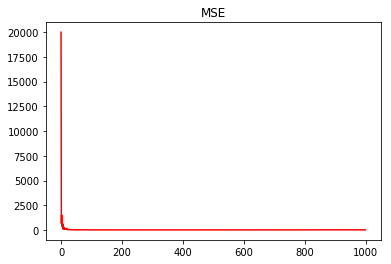

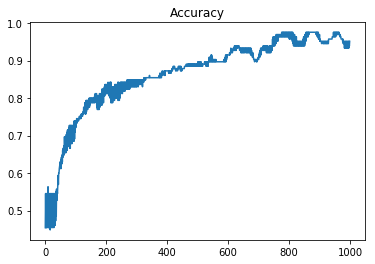

In [32]:
# Plot MSE and accuracy graph
plt.title("MSE")
plt.plot(mse_history,'r')
plt.show()
plt.title("Accuracy")
plt.plot(accuracy_history)